# **Objective**
The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features affecting the price of the house. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.



# **Data Dictionary**
Each record in the database describes a suburb or town in a Boston. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

**CRIM:** Per capita crime rate by town

**ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS:** Proportion of non-retail business acres per town

**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX:** Nitric Oxide concentration (parts per 10 million)

**RM:** The average number of rooms per dwelling

**AGE:** Proportion of owner-occupied units built before 1940

**DIS:** Weighted distances to five Boston employment centers

**RAD:** Index of accessibility to radial highways

**TAX:** Full-value property-tax rate per 10,000 dollars

**PTRATIO:** Pupil-teacher ratio by town

**LSTAT:** % lower status of the population

**MEDV:** Median value of owner-occupied homes in 1000 dollars




In [ ]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

import plotly.express as px

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for train / test split
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Just a visual unification
custom_palette = ['#d01c8b', '#4dac26']  # pink to green

# Seaborn defaults
sns.set_palette(custom_palette)
sns.set_style("whitegrid")  # Optional styling

#  Matplotlib defaults
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)

# Plotly defaults
px.defaults.color_discrete_sequence = custom_palette

# Optional case I use seaborn.color_palette("PiYG") elsewhere
piyg_palette = sns.color_palette("PiYG", 7).as_hex()


from matplotlib.colors import LinearSegmentedColormap

bubblegum_pistachio_cmap = LinearSegmentedColormap.from_list(
    name='bubblegum_pistachio',
    colors=['#d01c8b', '#f2b4d4', '#d9f0d3', '#4dac26']
)

In [ ]:
# Loading the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/MIT/DataSets/Boston.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First five records
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Observation: We have 12 independent variables and one dependent: MEDV

In [ ]:
# Checking general info regarding the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


# **Observations:**

* There are 13 variables in the data set including the dependent variable - MEDV

* In all variables there are 506 non-null observations, a strong indication that there are no missing values in any of the variables
* All variables are either float or integer - No categorical variables
* The dependent variable is of float dt as well


In [ ]:
# Check for missing values
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


**Observation:** Indeed no missing values

# **Exploratory Data Analysis and Data Preprocessing**

**Summary Statistics - Central tendency & Measures of Variability**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
# Function to plot a boxplot and a histogram along the same scale
# adapted, with changes, from MIT APDS histogram_boxplot example
import math
import matplotlib.pyplot as plt
import seaborn as sns

def multi_histogram_boxplot(df, features=None, ncols=2, figsize_per_plot=(4, 2), kde=False, bins=None):
    """
    Draw a boxplot stacked over a histogram for each numeric feature in a DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame containing data to visualize.
    features : list of str, optional
        List of column names to plot. If None, all numeric columns are used.
    ncols : int
        Number of subplots to display per row.
    figsize_per_plot : tuple(float, float)
        Size (width, height) for each feature's subplot pair.
    kde : bool
        Whether to overlay a KDE curve on the histogram.
    bins : int or None
        Number of bins for the histogram.
    """
    # 1. Determine which features to plot:
    if features is None:
        # Select all columns of numeric types if user didn't specify
        features = df.select_dtypes(include="number").columns.tolist()
    n = len(features)
    # Calculate how many rows of feature plots we'll need
    nrows = math.ceil(n / ncols)

    # 2. Create a grid of Matplotlib axes:
    # Each feature uses two stacked axes (boxplot above histogram)
    # So we multiply rows by 2 to get total plot rows
    fig, axes = plt.subplots(
        nrows = nrows * 2,
        ncols = ncols,
        sharex=False,
        figsize=(figsize_per_plot[0] * ncols,
                 figsize_per_plot[1] * nrows * 2),
        gridspec_kw={
            # Give 25% of vertical space to boxplots and 75% to histograms
            "height_ratios": [0.25, 0.75] * nrows
        }
    )
    # Reshape axes array to [feature_row, (box,hist), column]
    axes = axes.reshape(nrows, 2, ncols)

    # 3. Loop through each feature and draw plots:
    for idx, feature in enumerate(features):
        # Compute row and column index for this feature
        row = idx // ncols
        col = idx % ncols

        # Separate axes for boxplot (row,0) and histogram (row,1)
        ax_box = axes[row, 0, col]
        ax_hist = axes[row, 1, col]

        # --- Boxplot: show distribution summary above ---
        sns.boxplot(
            data=df,
            x=feature,
            ax=ax_box,
            showmeans=True ,        # mark the mean on the boxplot
            color="#d01c8b", # box color
            meanprops={
        #"marker": "X",
        "markerfacecolor": "#4dac26",
        "markeredgecolor": "#4dac26",
        "markersize": 7}
        )
        # Remove y-axis label and ticks for cleaner look
        ax_box.set(ylabel="")
        ax_box.tick_params(bottom=False, labelbottom=False)

        # --- Histogram: show frequency distribution below ---
        hist_kwargs = {
            'data': df,
            'x': feature,
            'kde': kde,
            'ax': ax_hist,
            'color': '#4dac26'
        }
        # Add bins if user specified
        if bins:
            hist_kwargs['bins'] = bins
        # Draw histogram
        sns.histplot(**hist_kwargs)

        # Overlay vertical lines for mean and median
        ax_hist.axvline(df[feature].mean(), color='#d01c8b', linestyle="--", label="mean")
        ax_hist.axvline(df[feature].median(), color="black", linestyle="-",  label="median")
        ax_hist.legend(loc="upper right", fontsize="small")

    # 4. Hide any unused subplots if feature count doesn't fill grid
    total_plots = nrows * ncols
    for idx in range(n, total_plots):
        row = idx // ncols
        col = idx % ncols
        # Turn off both box and histogram axes
        for subax in axes[row, :, col]:
            subax.set_visible(False)

    # 5. Final layout adjustments and display
    plt.tight_layout()
    plt.show()

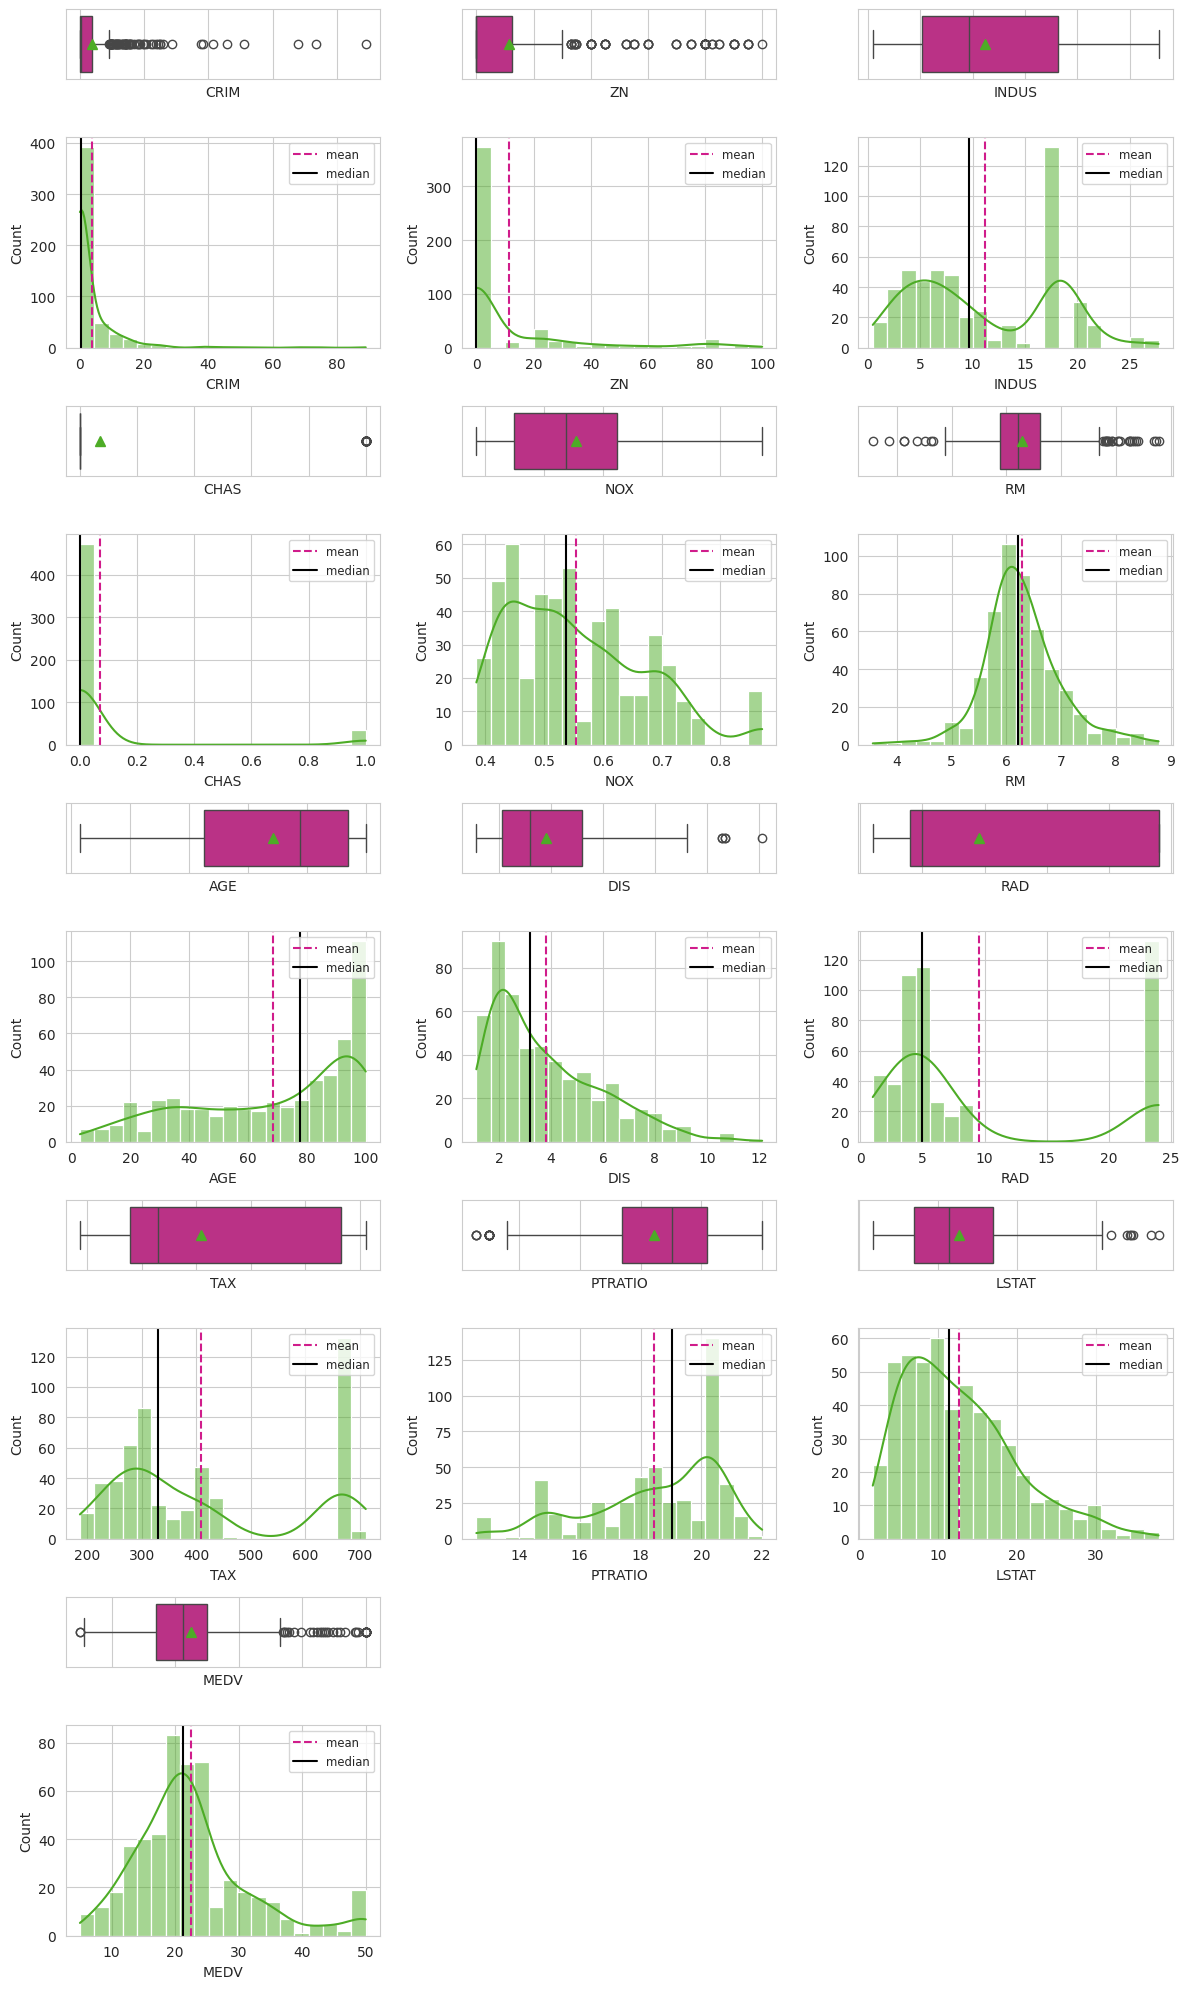

In [ ]:
multi_histogram_boxplot(df, ncols=3, figsize_per_plot=(4,2), kde=True, bins=20)

# **Observations:**


**CRIM:** Crime rate per capita is highly skewed to the right, with mode and median nearing 0, and maximum values reaching over 80%, pushing the mean up. This variable is a strong candidate for log feature engineering as it is highly skewed but continuous along the X bins.  

**ZN:** Proportion of residential land for large lots is highly skewed to the right, with mode and median on 0 (pure residetial), and maximum values reaching 100% (Pure industrial zones). This variable is a strong candidate for binarization - skewed and not continuous along the bins.

**INDUS:** Big cluster of non industrial towns between 0.5% to 10%, large cluster at exactly 18.1% (probably has something to do with regulations) and a small cluster between ~20% to ~28%. This variable is a strong candidate for binning to ordinal level.

**CHAS:** Charles River dummy variable. Way over 90% of towns do not bound the Charles river.

**NOX:** Nitric Oxide concentration (that's simply an indication for air pollution, parts per 10 million) - Skewed to the right. Range from ~0.4 to ~0.87.

**RM:** The average number of rooms per dwelling - Nice almost normal distribution. Suffers from a mild Leptokurtosis, but not anything that will require an orthopedic treatment.

**AGE:** Proportion of owner-occupied units built before 1940 - Skewed to the left. In most of the towns, most of the units were built before 1940.

**DIS:** Weighted distances to five Boston employment centers - Skewed to the right - Clusters are close to employment centers. Employment centers were built close to neighborhoods. (Historically, in this "Chicken and Egg" dilema, the chicken came first. I couldn't help but google)

**RAD:** Index of accessibility to radial highways - We see a large cluster with 24 score - highly accessible, and a cluster rabging between 1 and 9. This variable is a strong candidate for binarization - not continuous along the bins.

**TAX:** Full-value property-tax rate per 10,000 dollars - A cluster at ~700 and a cluster between ~200 and 450. A candidate for binrization or binning as ordinal. given the huge 0 observations gap between ~470 and ~650, probably binarization.

**PTRATIO:** Pupil-teacher ratio by town - Skewed to the left. with huge Pike on 21, hump around the mean - +-19, cluster around 15, and a tail below.

**LSTAT:** % lower status of the population - Skewed to the right. Median at 11.3 and mean - a bit higher.

**MEDV:** Median value of owner-occupied homes in 1000 dollars - Slightly skewed. We will have to log it - course requirements.

# **Outlier Treatment**
No suspicious outliers that need treatment detected. All values are at a reasonable range.

# **Transforming Our Target Variable MEDV**
I'll transform MEDV to MEDV_log, this will be the target variable instead of MEDV

In [ ]:
# Log MEDV
df['MEDV_log'] = np.log(df['MEDV'])

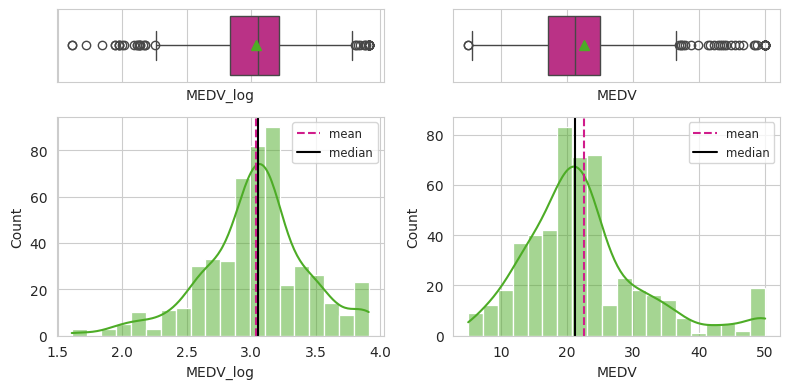

In [ ]:
multi_histogram_boxplot(df[['MEDV_log', 'MEDV']], ncols=2, figsize_per_plot=(4, 2), kde=True, bins=20)

In [ ]:
from scipy.stats import shapiro

shapiro_medv = shapiro(df['MEDV'])
shapiro_medv_log = shapiro(df['MEDV_log'])

print("Shapiro-Wilk Test for MEDV:")
print(f"Statistic={shapiro_medv.statistic:.4f}, p-value={shapiro_medv.pvalue:.4e}")

print("\nShapiro-Wilk Test for MEDV_log:")
print(f"Statistic={shapiro_medv_log.statistic:.4f}, p-value={shapiro_medv_log.pvalue:.4e}")

Shapiro-Wilk Test for MEDV:
Statistic=0.9172, p-value=4.9414e-16

Shapiro-Wilk Test for MEDV_log:
Statistic=0.9757, p-value=1.9354e-07


# **Observation:**
Partial success - Mean and median are closer and MEDV_log is visibly less skewed. Shapiro & Wilk say the distribution of MEDV_log is closer to normal, but not normal. Anyways, its good enough for our purposes, and Shapiro & Wilk are not here anymore to argue...

# **Bivariate Analysis**
Lets check correlations with scatterplots and a heatmap. Owr main goal is to explore correlations between the independednt variable. Our secondary goal is to explore correlations between the independent variables themselves.

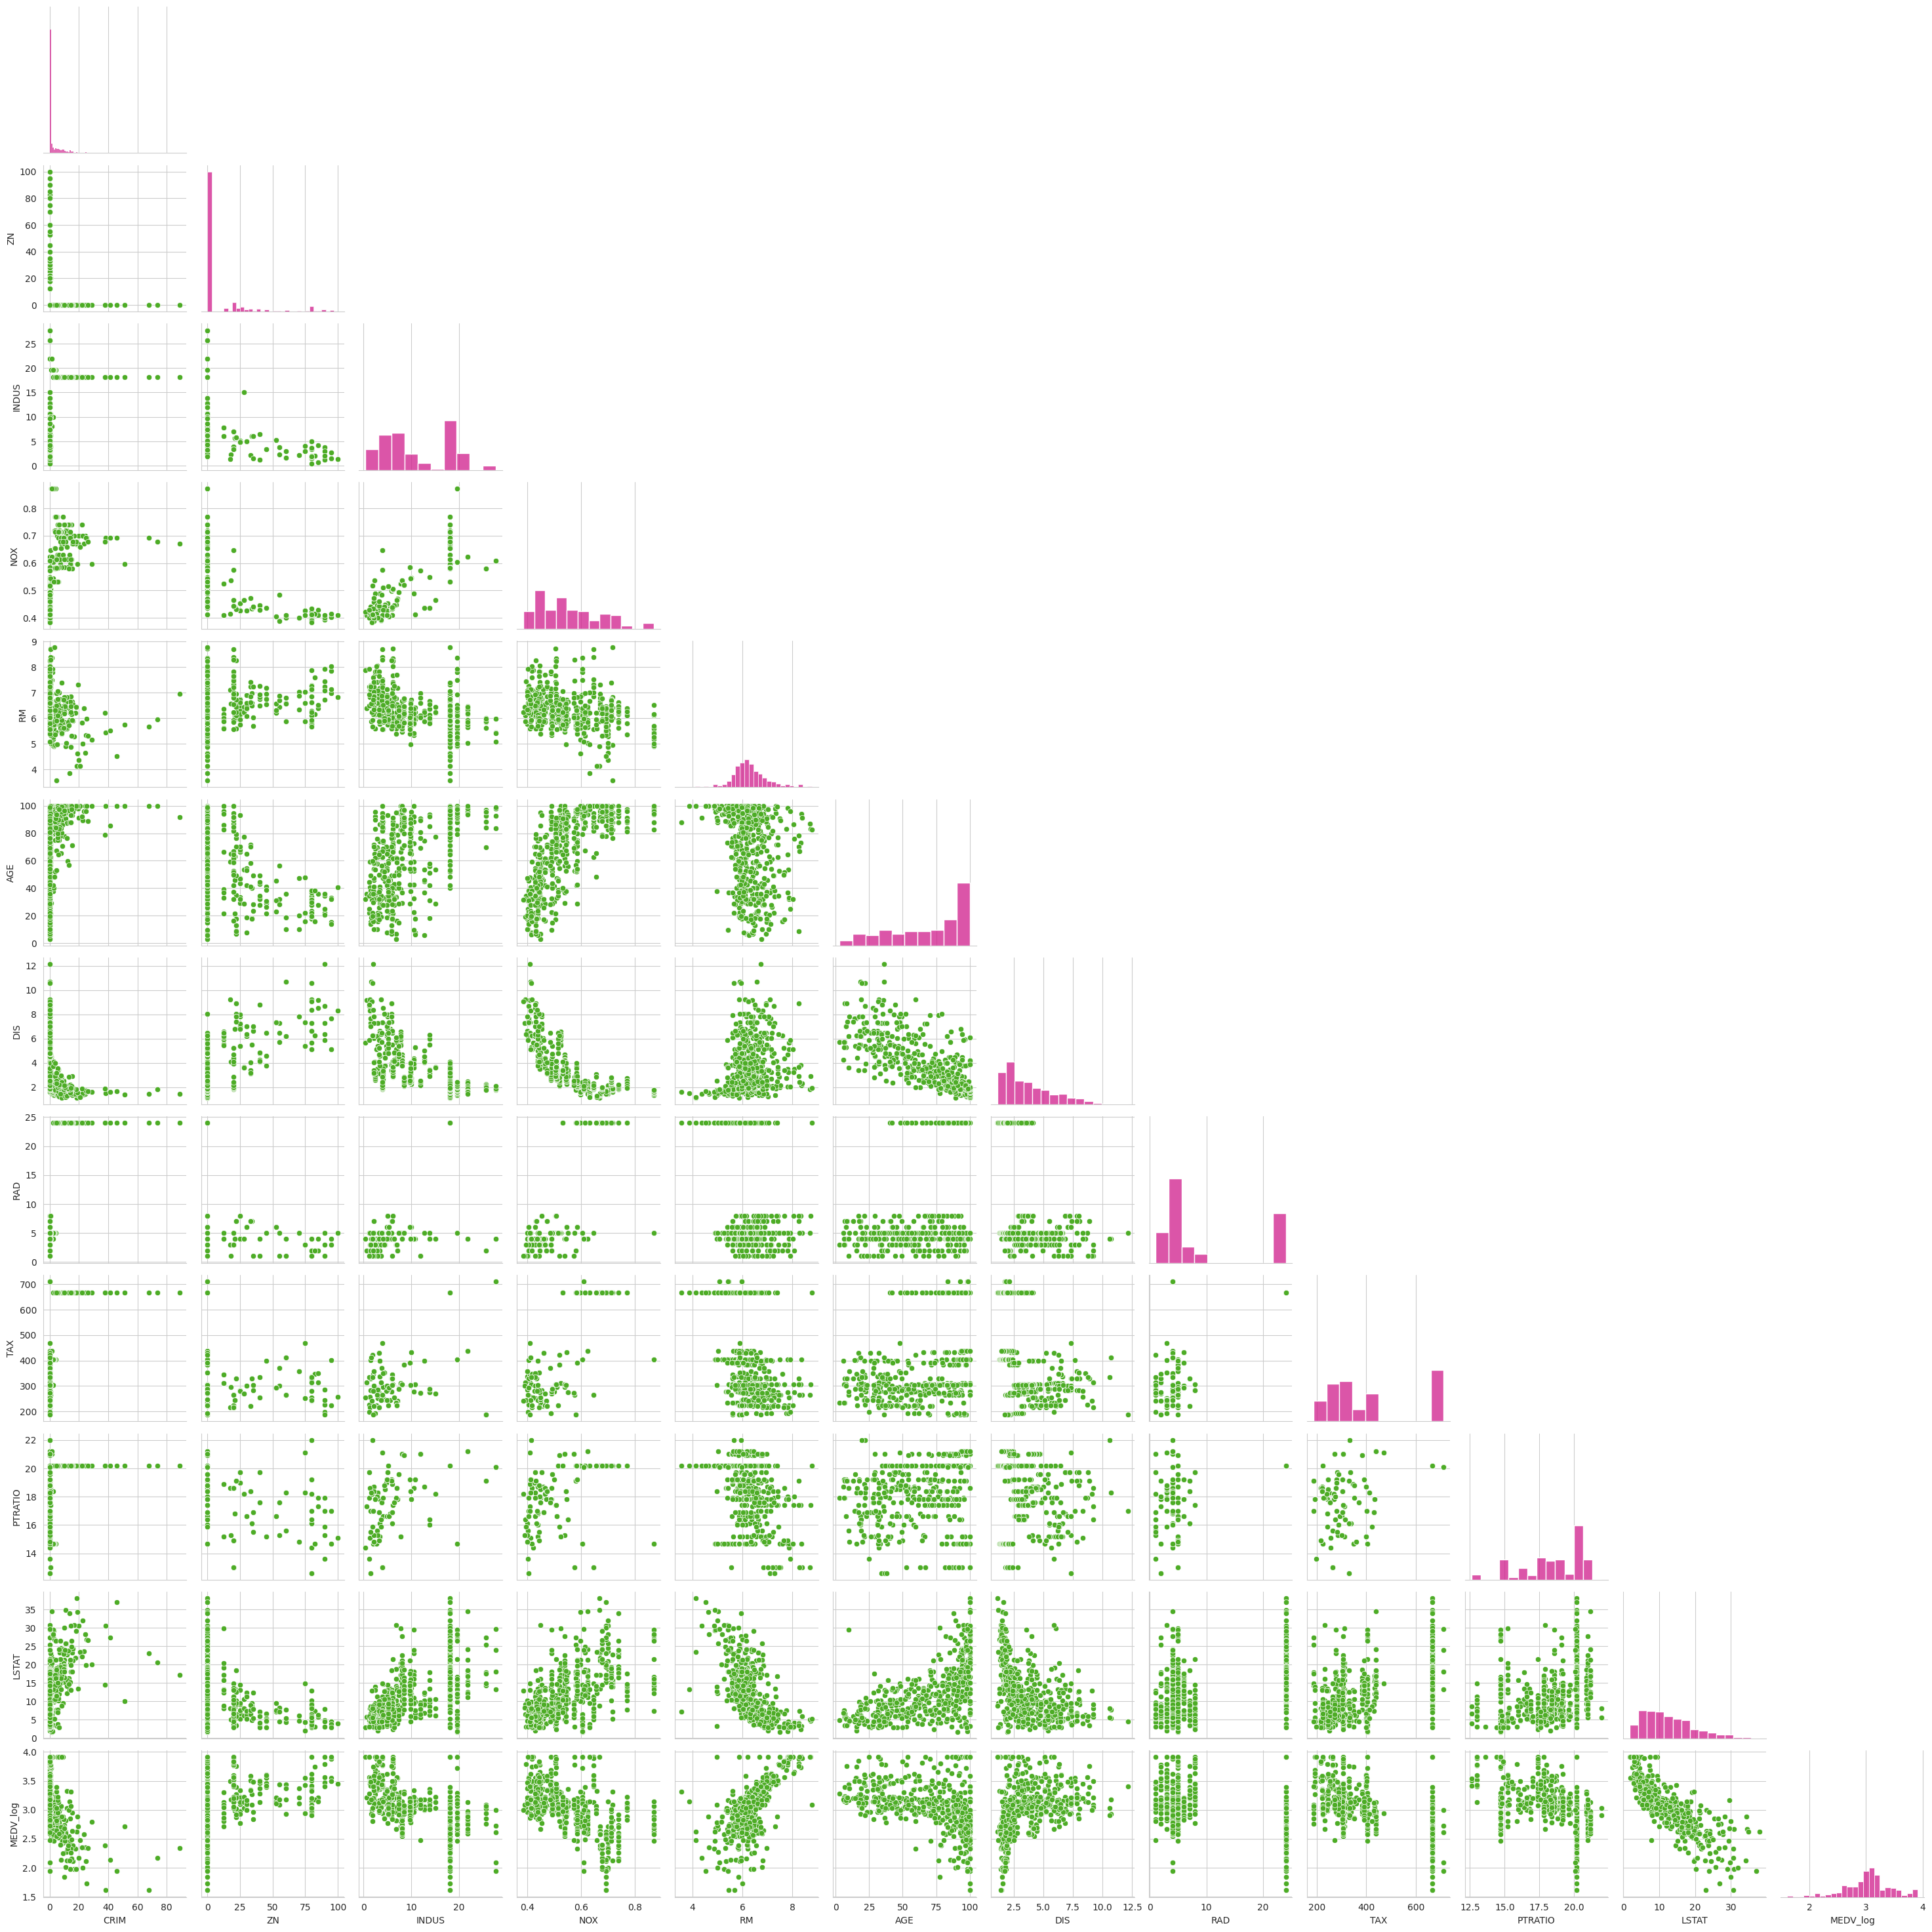

In [ ]:
# lets drop the old MEDV, and the binary CHAS. We will visualise it later, with engineered fields we will create
df_pp = df.drop(columns=['MEDV', 'CHAS'])
figsize=(10, 10)
sns.pairplot(df_pp, plot_kws={'color': '#4dac26'},  diag_kws={'color': '#d01c8b'}, corner=True) #
plt.show()

# **Observations**
We see nice visible correlations between our dependent MEDV_log to: CRIM, RM,DIS and LTSAT. As for other variables - for almost all variables we can recognize a change in frequency along the Y axis - MEDV_lg, but most outstanding is the need to binarize TAX, RAD, ZN and INDUS. But lets check the heatmap first.

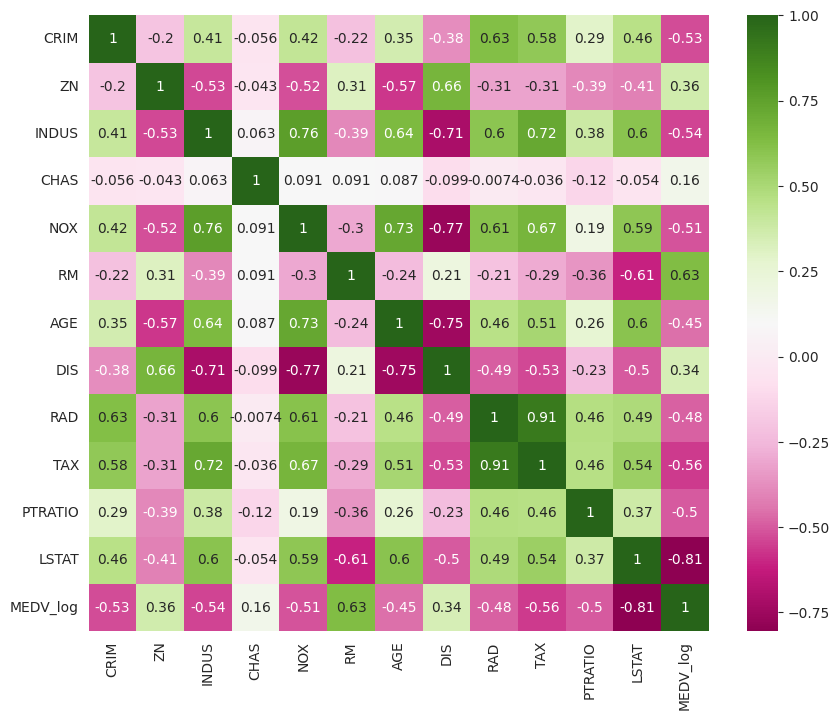

In [ ]:
# Heatmap
df = df.drop(columns=['MEDV'])
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'PiYG')
plt.show()

# **Observations:**

Except for CHAS that shows weak correlation with MEDV_log, all other variables show medium to strong correlation. Most outstanding is LTSAT, and after that, RM, TAX, INDUS and CRIM.
The conclusions are not surprising:

1) House prices go down as proportion of lower status population goes up

2) Prices go down with as Avg house is (RM as a proxy) goes up

3) The higher is the price of your house - the more property tax you pay

4) Prices go down in highly industrialized areas

5) Prices go down in areas with high crime

and so on correlations...

We can also observe correlation between the indepent variables:
Correlation between proximity to employment centers and indusrialization,
Correlation between industrialization factors (DIS and INDUS) and polution
social status and house size (RM), Age and distance to employment centers (radius is growing with time around the centers) and many others. **We will need to perform VIF...**



Observation:


# **PCA**

In this section I'll try to use PCA to identify axes of variation and to identify which features consistently associate with price, and in what direction. These are the reliable predictors that I want to prioritize.  
When PCA shows a variable that changes behavior across PCs, or has large loadings in opposing directions, we can infer nonlinearity

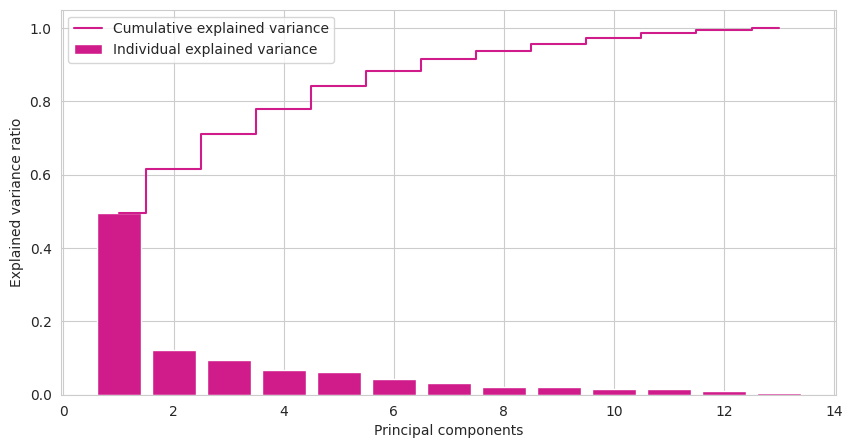

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Defining the number of principal components to generate

scaler = StandardScaler()
n_components = 10
subset = df.iloc[:, 0:].copy()

n = subset.shape[1]                                    # Storing the number of variables in the subset data

pca = PCA(n_components = n, random_state = 1)                                     # Initialize PCA with n_components = n and random_state = 1

subset_scaled = scaler.fit_transform(subset)

data_pca = pd.DataFrame(pca.fit_transform(subset_scaled))              # Fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_

# Cumulative variance explained by the principal components
cum_exp_var = np.cumsum(exp_var)

plt.figure(figsize = (10, 5))

plt.bar(range(1, n + 1), exp_var, align = "center", label = "Individual explained variance")
plt.step(range(1, n + 1), cum_exp_var, where = "mid", label = "Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc = "best")
plt.show()

In [ ]:
columns = subset.columns
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

def color_high(val):
    if val <= -0.25:
        return 'background: #d01c8b'
    elif val <= -0.10:
        return 'background: #e78ac3'
    elif val >= 0.25:
        return 'background: #4dac26'
    elif val >= 0.10:
        return 'background: #91c848'


data_pca_2 = pd.DataFrame(np.round(pca.components_[:6,:],2), index = pc_comps, columns = subset.columns)

data_pca_2.T.style \
    .format("{:.2f}") \
    .map(color_high)


,PC1,PC2,PC3,PC4,PC5,PC6
CRIM,0.25,-0.15,0.41,0.14,-0.16,0.71
ZN,-0.25,-0.21,0.37,0.35,-0.30,-0.30
INDUS,0.34,0.14,-0.02,-0.01,0.01,-0.36
CHAS,-0.00,0.45,-0.02,0.76,0.45,0.09
NOX,0.33,0.26,0.01,0.02,-0.24,-0.20
RM,-0.20,0.38,0.45,-0.30,0.01,0.20
AGE,0.30,0.28,-0.15,-0.10,-0.15,0.14
DIS,-0.30,-0.37,0.09,0.20,0.08,-0.10
RAD,0.30,-0.04,0.48,-0.00,0.13,-0.16
TAX,0.33,-0.05,0.40,0.01,0.06,-0.34


In [ ]:
# sklearn: components_.shape = (n_components, n_features) with unit-length rows
# Correlation-style loadings = eigenvectors * sqrt(eigenvalues)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)  # (n_features, n_components)

#  making PC signs consistent - largest absolute loading is positive
for j in range(loadings.shape[1]):
    if loadings[np.argmax(np.abs(loadings[:, j])), j] < 0:
        loadings[:, j] *= -1

load_df = pd.DataFrame(np.round(loadings[:, :6], 2), index=subset.columns, columns=pc_comps)

def color_high(val):
    if val is None: return ""
    if val <= -0.25: return 'background: #d01c8b'
    if val <= -0.10: return 'background: #e78ac3'
    if val >=  0.25: return 'background: #4dac26'
    if val >=  0.10: return 'background: #91c848'
    return ""
load_df.style.format("{:.2f}").map(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
CRIM,0.62,-0.19,0.45,0.13,-0.15,0.52
ZN,-0.63,-0.26,0.41,0.32,-0.27,-0.22
INDUS,0.85,0.17,-0.02,-0.01,0.01,-0.26
CHAS,-0.01,0.56,-0.02,0.72,0.41,0.07
NOX,0.83,0.33,0.01,0.02,-0.22,-0.15
RM,-0.52,0.48,0.49,-0.28,0.01,0.15
AGE,0.77,0.36,-0.17,-0.09,-0.13,0.10
DIS,-0.77,-0.47,0.10,0.19,0.07,-0.07
RAD,0.77,-0.05,0.53,-0.00,0.12,-0.12
TAX,0.83,-0.06,0.44,0.01,0.06,-0.25


PC1 = low price	associated with high CRIM, high LSTAT, high NOX, high INDUS, low RM, low DIS, high RAD

PC2 = high price	associated with high CHAS, low CRIM, high RM, low LSTAT

PC3 = high price but less than PC2 Associated with high CRIM, lower INDUS, low AGE, high RM, high RAD, high ZN. This axis of variance is caused by Wealthy suburbs maybe?

PC4 = low price, but not as PC1, low RM, mid level CRIM, high CHAS and high ZN, high LSTAT, but not as in PC1. Is this axis of variance caused by Poor areas in some level of gentrification?

For those of you who lived in Boston in the 70's and early 80's, can you identify areas with these attributions?


PCA helps us identify which features are consistently associated with high housing prices across the main axes of variation. These are features we can later break down to uncover nonlinear patterns and enhance their predictive power.

It also helps us spot features whose relationship with price isn't consistent - features that behave differently across axes. Some of these may turn out to be better suited as classifiers.

**Strong monotonic Variables**

Take RM and LSTAT, for example. Their relationship with housing prices is pretty monotonic across all major principal components. We'll explore nonlinear transformations for them as well, just to squeeze out a bit more accuracy.

**Age**

But then there's AGE, which behaves… weirdly. On the first principal component, older buildings correlate with lower prices. On the second, it's the opposite - older buildings associate with higher prices. And on the third, it flips again: newer buildings drive prices up. What's going on here?

This is where some basic business common sense comes in. We all know that brand-new neighborhoods often have higher appeal. But we also know that some cities have historic areas - old buildings, yes, but sky-high prices. Think of places like Beacon Hill or the South End in Boston. Or, internationally: Montmartre in Paris, Notting Hill in London, Greenwich Village in NYC. Some were always central and strong; others were lifted by gentrification.

Using both the PCA output and some domain intuition, I can start distinguishing between two types of old neighborhoods:

old, neglected, and cheap;

old, desirable, and expensive.

LSTAT is monotonic with our target variable across the principal components - and that checks out. It captures socioeconomic concentration directly.

We all know from experience that young families often tolerate older housing if the local schools are strong. So PTRATIO also fits. It aligns well with the target variable across most PCs- 1 through 3, and 5 - even though PCA4 shows a bit of noise.

So.for my classifiers, I'll rely on LSTAT, PTRATIO, and my newly engineered AGE variable.

**Crime**

CRIM, like AGE, is non-monotonic. On the second principal component, neighborhoods with low crime rates are associated with high housing prices - and the reason is straightforward.
But in our third principal component, we observe very high crime rates also associated with relatively high housing prices.

In components 4 to 6, crime returns to correlate monotonically with our target.

What is going on?

Let's look at what differentiates our two high-price PCs.
In PC3, the first standout variable is ZN - this component is far more residential than PC2. We can also observe that PC3 reflects newer developments.

Even without pinpointing the exact nature of the cluster driving the PC3 variation axis, we can begin to tell a plausible story:
Low crime rates are typically associated with high housing prices (crystal clear, isn't it?).
But in some middle-class and upper-middle-class areas, which are relatively new and highly residential, we still see high crime rates- and yet, strong demand and a robust population.

That's enough signal to justify engineering the CRIM variable accordingly.

**Note on CRIM and AGE engineered features:**
Bringing other strong variables as classifiers may overlap with parts of the signal that CRIM and AGE were originally carrying. That does introduce some redundancy. But I'm betting that the added clarity and stronger business rationale behind the transformed variables will justify it - even if it's partially collinear, it now makes more sense and can play a distinct role.


In [ ]:
# Looking for highly contrasted features between PC1&4 (high price) vs PC2&3 (low price) centering them and squaring them so the model could capture non-linear(U-shaped or inverted U-shaped) effects

df['RM_centered'] = df['RM'] - df['RM'].mean()
df['RM_squared'] = df['RM_centered'] ** 2


df['LSTAT_centered'] = df['LSTAT'] - df['LSTAT'].mean()
df['LSTAT_squared'] = df['LSTAT_centered'] ** 2

# DIS is showing non monotonic pattern I'll try to capture non-linear effect from him as well
df['DIS_centered'] = df['DIS'] - df['DIS'].mean()
df['DIS_squared'] = df['DIS_centered'] ** 2


# RAD is not continuous so it will not be useful if squared, it likely represents a nonlinear or thresholded effect. So is TAX
df['RAD_centered'] = df['RAD'] - df['RAD'].mean()


# AGE

df['OLD_AREA'] = ((df['AGE'] > 55) & (df['LSTAT'] < df['LSTAT'].mean()) & (df['PTRATIO'] < df['PTRATIO'].mean())).astype(int)

df['AGE_trans'] = df['AGE'] / ((df['OLD_AREA']) + 1)

# CRIM

#df['RISK_PICKET_FENCES'] = ((df['CRIM'] > 0.3)  & (df['ZN'] > 0) & (df['NOX'] < 0.5)).astype(int)

df['RISKIE_MIDCALSS'] = ((df['CRIM'] > 0.3)  & (df['ZN'] > 0) & (df['AGE'] < df['AGE'].mean())).astype(int)

df['CRIM_trans'] = df['CRIM'] / ((df['RISKIE_MIDCALSS']) + 1)

df['CRIM_trans_centered'] = df['CRIM_trans'] - df['CRIM_trans'].mean()
df['CRIM_trans_squared'] = df['CRIM_trans'] ** 2



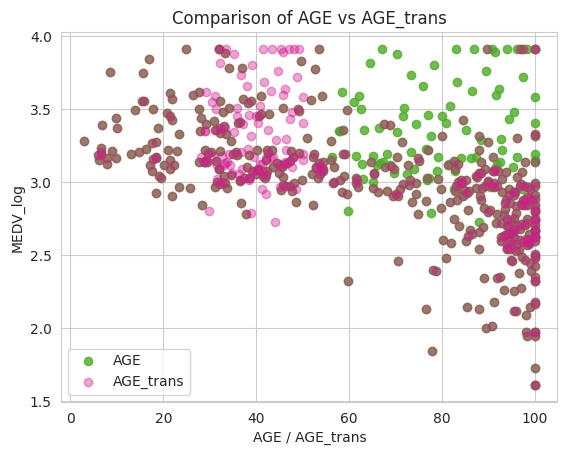

In [ ]:
# Scatter AGE
plt.scatter(df['AGE'], df['MEDV_log'], color='#4dac26', label='AGE', alpha=0.8)

# Scatter AGE_trans
plt.scatter(df['AGE_trans'], df['MEDV_log'], color='#d01c8b', label='AGE_trans', alpha=0.4)

plt.xlabel('AGE / AGE_trans')
plt.ylabel('MEDV_log')
plt.title('Comparison of AGE vs AGE_trans')
plt.legend()
plt.grid(True)
plt.show()

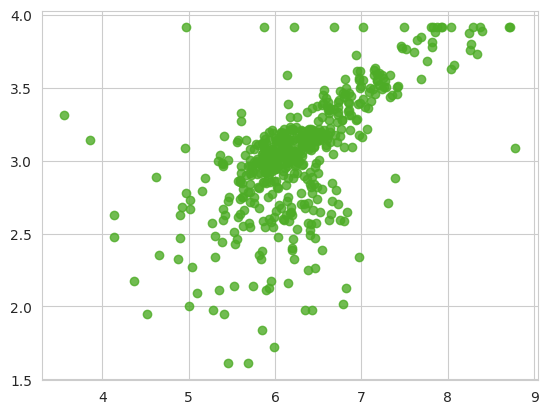

In [ ]:
# Scatter RM and MEDV_log
plt.scatter(df['RM'], df['MEDV_log'], color='#4dac26', label='RM', alpha=0.8)

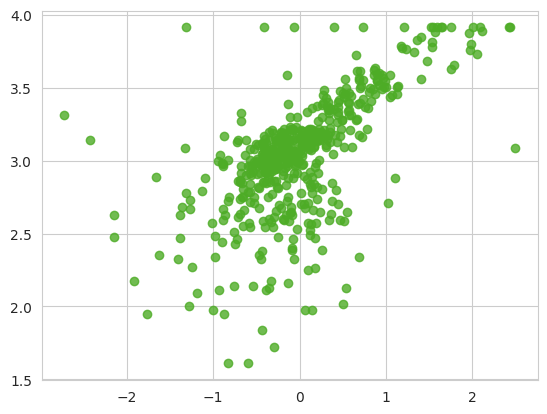

In [ ]:
# Scatter RM_centered and MEDV_log
plt.scatter(df['RM_centered'], df['MEDV_log'], color='#4dac26', label='RM', alpha=0.8)

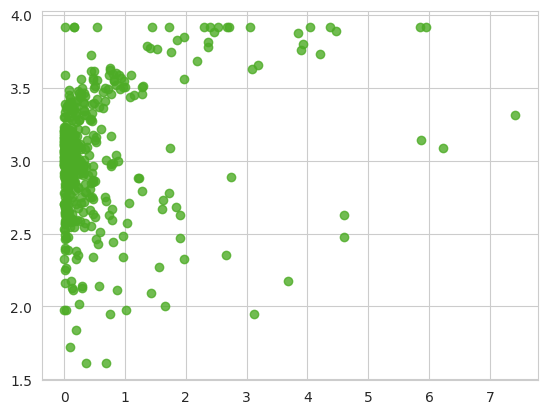

In [ ]:
# Scatter RM_squared and MEDV_log
plt.scatter(df['RM_squared'], df['MEDV_log'], color='#4dac26', label='RM', alpha=0.8)

# **Observation**
We can see how the green cluster is now split to left high and right low, showing clearer downward trend of price as AGE_trans goes up

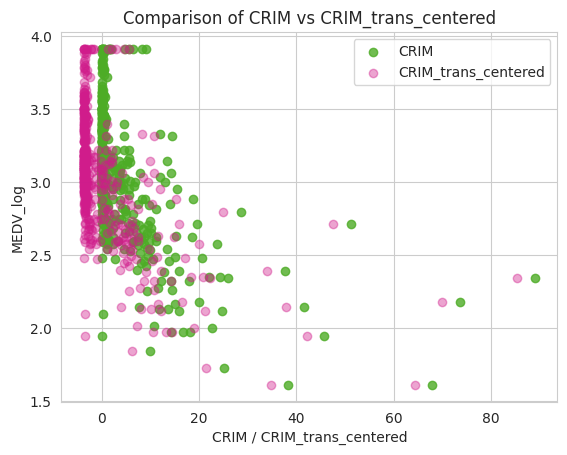

In [ ]:
# Scatter CRIM
plt.scatter(df['CRIM'], df['MEDV_log'], color='#4dac26', label='CRIM', alpha=0.8)

#  Scatter CRIM_trans
plt.scatter(df['CRIM_trans_centered'], df['MEDV_log'], color='#d01c8b', label='CRIM_trans_centered', alpha=0.4)

plt.xlabel('CRIM / CRIM_trans_centered')
plt.ylabel('MEDV_log')
plt.title('Comparison of CRIM vs CRIM_trans_centered')
plt.legend()
plt.grid(True)
plt.show()

# **Observation**
The change is not visible, but a few observations moved from here to there will give more explanatory power as we will later see in the SHAP values.

In [ ]:

X_base = df.drop(columns=[col for col in df.columns if any(x in col for x in ['squared', 'centered', 'dum', 'bin', 'trans', 'OLD', 'MEDV_log', 'RISK'])])

X = df.drop(columns=[col for col in df.columns if any(x in col for x in ['bin', 'MEDV_log','OLD_AREA', 'RISK'])])

y = df['MEDV_log']  # same target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=1)


# Fit OLS Models Using statsmodels:
import statsmodels.api as sm

# FE model
X_train_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_const).fit()

X_base_train_const = sm.add_constant(X_base_train)
ols_base = sm.OLS(y_train, X_base_train_const).fit()

# Print key stats:

print("OLS Model:\n", ols.summary())
print("OLS Base Model:\n", ols_base.summary())


OLS Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          1.00e-135
Time:                        12:07:11   Log-Likelihood:                 150.52
No. Observations:                 404   AIC:                            -263.0
Df Residuals:                     385   BIC:                            -187.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def model_pref(olsmodel, x_train, x_test, y_train, y_test):
    x_train_const = sm.add_constant(x_train)
    x_test_const = sm.add_constant(x_test)

    # In-sample prediction
    y_pred_train = olsmodel.predict(x_train_const)
    y_pred_test = olsmodel.predict(x_test_const)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_train, y_pred_train)),
                    np.sqrt(mean_squared_error(y_test, y_pred_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_train, y_pred_train),
                    mean_absolute_error(y_test, y_pred_test),
                ],
                "R²": [
                    r2_score(y_train, y_pred_train),
                    r2_score(y_test, y_pred_test),
                ],
            }
        )
    )


print("Model")
model_pref(ols, X_train, X_test, y_train, y_test)




Model
    Data      RMSE       MAE        R²
0  Train  0.166708  0.120502  0.829934
1   Test  0.174872  0.128920  0.830020


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif['Features'] = train.columns
    # Calculating VIF for each feature
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

# **Cleaning noisy features**

In [ ]:
 print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.042443e+05
2                    ZN  3.132839e+00
3                 INDUS  4.035383e+00
4                  CHAS  1.091471e+00
5                   NOX  5.218607e+00
6                    RM           inf
7                   AGE  7.937936e+00
8                   DIS           inf
9                   RAD           inf
10                  TAX  9.932225e+00
11              PTRATIO  2.320719e+00
12                LSTAT           inf
13          RM_centered           inf
14           RM_squared  1.463079e+00
15       LSTAT_centered           inf
16        LSTAT_squared  2.716670e+00
17         DIS_centered           inf
18          DIS_squared  3.559437e+00
19         RAD_centered           inf
20            AGE_trans  9.103355e+00
21           CRIM_trans           inf
22  CRIM_trans_centered           inf
23   CRIM_trans_squared  1.150488e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['RM'])
print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.042443e+05
2                    ZN  3.132839e+00
3                 INDUS  4.035383e+00
4                  CHAS  1.091471e+00
5                   NOX  5.218607e+00
6                   AGE  7.937936e+00
7                   DIS           inf
8                   RAD           inf
9                   TAX  9.932225e+00
10              PTRATIO  2.320719e+00
11                LSTAT           inf
12          RM_centered  2.010903e+00
13           RM_squared  1.463079e+00
14       LSTAT_centered           inf
15        LSTAT_squared  2.716670e+00
16         DIS_centered           inf
17          DIS_squared  3.559437e+00
18         RAD_centered           inf
19            AGE_trans  9.103355e+00
20           CRIM_trans           inf
21  CRIM_trans_centered           inf
22   CRIM_trans_squared  1.150488e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['RAD'])
print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.042443e+05
2                    ZN  3.132839e+00
3                 INDUS  4.035383e+00
4                  CHAS  1.091471e+00
5                   NOX  5.218607e+00
6                   AGE  7.937936e+00
7                   DIS           inf
8                   TAX  9.932225e+00
9               PTRATIO  2.320719e+00
10                LSTAT           inf
11          RM_centered  2.010903e+00
12           RM_squared  1.463079e+00
13       LSTAT_centered           inf
14        LSTAT_squared  2.716670e+00
15         DIS_centered           inf
16          DIS_squared  3.559437e+00
17         RAD_centered  9.970186e+00
18            AGE_trans  9.103355e+00
19           CRIM_trans           inf
20  CRIM_trans_centered           inf
21   CRIM_trans_squared  1.150488e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['LSTAT'])
print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.042443e+05
2                    ZN  3.132839e+00
3                 INDUS  4.035383e+00
4                  CHAS  1.091471e+00
5                   NOX  5.218607e+00
6                   AGE  7.937936e+00
7                   DIS           inf
8                   TAX  9.932225e+00
9               PTRATIO  2.320719e+00
10          RM_centered  2.010903e+00
11           RM_squared  1.463079e+00
12       LSTAT_centered  6.007536e+00
13        LSTAT_squared  2.716670e+00
14         DIS_centered           inf
15          DIS_squared  3.559437e+00
16         RAD_centered  9.970186e+00
17            AGE_trans  9.103355e+00
18           CRIM_trans           inf
19  CRIM_trans_centered           inf
20   CRIM_trans_squared  1.150488e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['TAX'])
print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.040073e+05
2                    ZN  3.000790e+00
3                 INDUS  3.444774e+00
4                  CHAS  1.074497e+00
5                   NOX  5.206689e+00
6                   AGE  7.933637e+00
7                   DIS           inf
8               PTRATIO  2.311815e+00
9           RM_centered  2.007376e+00
10           RM_squared  1.462791e+00
11       LSTAT_centered  6.004512e+00
12        LSTAT_squared  2.706981e+00
13         DIS_centered           inf
14          DIS_squared  3.529618e+00
15         RAD_centered  4.516925e+00
16            AGE_trans  9.100180e+00
17           CRIM_trans           inf
18  CRIM_trans_centered           inf
19   CRIM_trans_squared  1.150379e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['AGE'])
print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.029604e+05
2                    ZN  2.734926e+00
3                 INDUS  3.331637e+00
4                  CHAS  1.074162e+00
5                   NOX  5.178890e+00
6                   DIS           inf
7               PTRATIO  2.134827e+00
8           RM_centered  1.933228e+00
9            RM_squared  1.460654e+00
10       LSTAT_centered  5.994295e+00
11        LSTAT_squared  2.696474e+00
12         DIS_centered           inf
13          DIS_squared  3.162919e+00
14         RAD_centered  4.510848e+00
15            AGE_trans  4.348541e+00
16           CRIM_trans           inf
17  CRIM_trans_centered           inf
18   CRIM_trans_squared  1.150355e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['DIS'])
print(checking_vif(X_train_const))

               Features           VIF
0                 const  0.000000e+00
1                  CRIM  1.029604e+05
2                    ZN  2.734926e+00
3                 INDUS  3.331637e+00
4                  CHAS  1.074162e+00
5                   NOX  5.178890e+00
6               PTRATIO  2.134827e+00
7           RM_centered  1.933228e+00
8            RM_squared  1.460654e+00
9        LSTAT_centered  5.994295e+00
10        LSTAT_squared  2.696474e+00
11         DIS_centered  7.423953e+00
12          DIS_squared  3.162919e+00
13         RAD_centered  4.510848e+00
14            AGE_trans  4.348541e+00
15           CRIM_trans           inf
16  CRIM_trans_centered           inf
17   CRIM_trans_squared  1.150355e+01


In [ ]:
X_train_const = X_train_const .drop(columns=['CRIM'])
print(checking_vif(X_train_const))

               Features        VIF
0                 const   0.000000
1                    ZN   2.724285
2                 INDUS   3.299351
3                  CHAS   1.068851
4                   NOX   5.172611
5               PTRATIO   2.112963
6           RM_centered   1.928325
7            RM_squared   1.428272
8        LSTAT_centered   5.966365
9         LSTAT_squared   2.680535
10         DIS_centered   7.389972
11          DIS_squared   3.130473
12         RAD_centered   4.504381
13            AGE_trans   4.320181
14           CRIM_trans        inf
15  CRIM_trans_centered        inf
16   CRIM_trans_squared  11.491654


In [ ]:
X_train_const = X_train_const .drop(columns=['CRIM_trans'])
print(checking_vif(X_train_const))

               Features         VIF
0                 const  324.721441
1                    ZN    2.724285
2                 INDUS    3.299351
3                  CHAS    1.068851
4                   NOX    5.172611
5               PTRATIO    2.112963
6           RM_centered    1.928325
7            RM_squared    1.428272
8        LSTAT_centered    5.966365
9         LSTAT_squared    2.680535
10         DIS_centered    7.389972
11          DIS_squared    3.130473
12         RAD_centered    4.504381
13            AGE_trans    4.320181
14  CRIM_trans_centered   18.364034
15   CRIM_trans_squared   11.491654


# **Observations:**
CRIM_trans_centered and CRIM_trans_squared, our new transformed variables, have VIF > 10. I will not exclude tham from the model because as you will see later they will be very valuable. I hope the VIF police will not arrest me for this crime.

In [ ]:
# Drop high-VIF variable
X_train = X_train.drop(columns=['RM', 'RAD', 'LSTAT', 'TAX', 'AGE', 'DIS', 'CRIM', 'CRIM_trans'])




# Add constant
X_train_const = sm.add_constant(X_train)


# Re-fit the models
ols = sm.OLS(y_train, X_train_const).fit()


In [ ]:
X_train_const.head()

,const,ZN,INDUS,CHAS,NOX,PTRATIO,RM_centered,RM_squared,LSTAT_centered,LSTAT_squared,DIS_centered,DIS_squared,RAD_centered,AGE_trans,CRIM_trans_centered,CRIM_trans_squared
42,1.0,0.0,6.91,0,0.448,17.9,-0.115634,0.013371,-6.843063,46.827515,1.925857,3.708926,-6.549407,6.6,-3.469465,0.020022
58,1.0,25.0,5.13,0,0.453,19.7,-0.139634,0.019498,-5.793063,33.559582,4.019757,16.158449,-1.549407,29.2,-3.456515,0.023855
385,1.0,0.0,18.10,0,0.700,20.2,-1.007634,1.015327,18.156937,329.674352,-2.368943,5.611889,14.450593,98.1,13.200835,282.636619
78,1.0,0.0,12.83,0,0.437,18.7,-0.052634,0.002770,-0.313063,0.098009,1.219057,1.486101,-4.549407,53.7,-3.554505,0.003188
424,1.0,0.0,18.10,0,0.584,20.2,-0.719634,0.517874,4.506937,20.312479,-1.731543,2.998240,14.450593,70.6,5.181155,77.301374


In [ ]:
print(" Model:\n", ols.summary())


 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     120.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.40e-135
Time:                        12:07:13   Log-Likelihood:                 142.04
No. Observations:                 404   AIC:                            -252.1
Df Residuals:                     388   BIC:                            -188.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4

# **Backward Eliminating**

In [ ]:
X_train = X_train.drop(columns=['INDUS'])
# Add constant
X_train_const = sm.add_constant(X_train)
# Re-fit the models
ols = sm.OLS(y_train, X_train_const).fit()
print(" Model:\n", ols.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     128.7
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.69e-136
Time:                        12:07:13   Log-Likelihood:                 141.77
No. Observations:                 404   AIC:                            -253.5
Df Residuals:                     389   BIC:                            -193.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4

In [ ]:
X_train = X_train.drop(columns=['ZN'])
# Add constant
X_train_const = sm.add_constant(X_train)
# Re-fit the models
ols = sm.OLS(y_train, X_train_const).fit()
print(" Model:\n", ols.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     138.9
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.32e-137
Time:                        12:07:13   Log-Likelihood:                 141.73
No. Observations:                 404   AIC:                            -255.5
Df Residuals:                     390   BIC:                            -199.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4

In [ ]:
X_test_const = sm.add_constant(X_test[X_train.columns])  # Only keep the same columns


# Evaluate each model
print("OLS")
model_pref(ols, X_train_const, X_test_const, y_train, y_test)


OLS
    Data      RMSE       MAE        R²
0  Train  0.170374  0.123245  0.822371
1   Test  0.184531  0.133291  0.810723


# **Let's clean the base model**

In [ ]:
print(checking_vif(X_base_train_const))

   Features         VIF
0     const  545.469224
1      CRIM    1.725903
2        ZN    2.515170
3     INDUS    3.812858
4      CHAS    1.072320
5       NOX    4.421201
6        RM    1.925194
7       AGE    3.225755
8       DIS    4.205930
9       RAD    8.076667
10      TAX    9.807470
11  PTRATIO    1.859054
12    LSTAT    2.988056


In [ ]:
X_base_train_const = X_base_train_const .drop(columns=['TAX'])
print(checking_vif(X_base_train_const))

   Features         VIF
0     const  540.199233
1      CRIM    1.725652
2        ZN    2.345346
3     INDUS    3.148244
4      CHAS    1.054949
5       NOX    4.386427
6        RM    1.917888
7       AGE    3.222853
8       DIS    4.202153
9       RAD    2.775321
10  PTRATIO    1.841052
11    LSTAT    2.986331


In [ ]:
# Drop high-VIF variable
X_base_train = X_base_train.drop(columns=['TAX'])


# Add constant
X_base_train_const = sm.add_constant(X_base_train)


# Re-fit the models
ols_base = sm.OLS(y_train, X_base_train_const).fit()

In [ ]:
print(" Model:\n", ols_base.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     125.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          9.46e-121
Time:                        12:07:13   Log-Likelihood:                 96.797
No. Observations:                 404   AIC:                            -169.6
Df Residuals:                     392   BIC:                            -121.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4201      0.224     19.774

In [ ]:
X_base_train = X_base_train.drop(columns=['INDUS'])
# Add constant
X_base_train_const = sm.add_constant(X_base_train)
# Re-fit the models
ols_base = sm.OLS(y_train, X_base_train_const).fit()
print(" Model:\n", ols_base.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     137.6
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          9.51e-122
Time:                        12:07:13   Log-Likelihood:                 96.598
No. Observations:                 404   AIC:                            -171.2
Df Residuals:                     393   BIC:                            -127.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4275      0.223     19.851

In [ ]:
X_base_train = X_base_train.drop(columns=['AGE'])
# Add constant
X_base_train_const = sm.add_constant(X_base_train)
# Re-fit the models
ols_base = sm.OLS(y_train, X_base_train_const).fit()
print(" Model:\n", ols_base.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     153.1
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          9.79e-123
Time:                        12:07:13   Log-Likelihood:                 96.319
No. Observations:                 404   AIC:                            -172.6
Df Residuals:                     394   BIC:                            -132.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4175      0.223     19.854

In [ ]:
X_base_train = X_base_train.drop(columns=['ZN'])
# Add constant
X_base_train_const = sm.add_constant(X_base_train)
# Re-fit the models
ols_base = sm.OLS(y_train, X_base_train_const).fit()
print(" Model:\n", ols_base.summary())

 Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     171.3
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.30e-123
Time:                        12:07:13   Log-Likelihood:                 95.125
No. Observations:                 404   AIC:                            -172.2
Df Residuals:                     395   BIC:                            -136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4259      0.223     19.864

In [ ]:

# Add constant
X_base_train_const = sm.add_constant(X_base_train)
X_train_const = sm.add_constant(X_train)

# Re-fit the models
ols_base = sm.OLS(y_train, X_base_train_const).fit()
ols = sm.OLS(y_train, X_train_const).fit()

print("Base Model:\n", ols_base.summary())
print("\n Model:\n", ols.summary())



Base Model:
                             OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     171.3
Date:                Thu, 21 Aug 2025   Prob (F-statistic):          2.30e-123
Time:                        12:07:13   Log-Likelihood:                 95.125
No. Observations:                 404   AIC:                            -172.2
Df Residuals:                     395   BIC:                            -136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4259      0.223     19

In [ ]:
X_base_test_const = sm.add_constant(X_base_test[X_base_train.columns])  # Only keep the same columns
X_test_const = sm.add_constant(X_test[X_train.columns])


# Evaluate each model
print("Base Model")
model_pref(ols_base, X_base_train_const, X_base_test_const, y_train, y_test)

print("Model")
model_pref(ols, X_train_const, X_test_const, y_train, y_test)


Base Model
    Data      RMSE       MAE        R²
0  Train  0.191208  0.139041  0.776274
1   Test  0.207741  0.158037  0.760117
Model
    Data      RMSE       MAE        R²
0  Train  0.170374  0.123245  0.822371
1   Test  0.184531  0.133291  0.810723


# **Observations:**
**Yey! our new featured engineered model is showing better performance, less errors and no overfitting!**

# **Let's Check Some linear regression assumptions:**

1) **Mean of residuals should be 0**

2) **Heteroscedasticity**

3) **Linearity of variables**

4) **Normality of error terms**


# **Mean of Residuals**

In [ ]:
print('Base')
ols_base.resid.mean()


Base


np.float64(7.936445779993693e-16)

In [ ]:
print('Bin')
ols.resid.mean()

Bin


np.float64(-3.050365240925554e-16)

# **Observations:**
In both models we can see that the mean of residuals is as good as 0

# **Homoscedasticity**

It has nothing to do with LGBT!

In linear models, we assume that the residuals have constant variance (this is known as homoscedasticity). It means that the residuals are evenly spread across all levels of the predicted values, rather than forming patterns or widening/narrowing along the regression line.

I'll use Goldfeldquandt Test to test the following hypothesis with alpha = 0.05:

Null hypothesis: Residuals are homoscedastic
Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
def plot_residuals_vs_predicted(model, X, y, title=''):
    X_const = sm.add_constant(X)
    y_pred = model.predict(X_const)
    residuals = y - y_pred

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='#4dac26', linestyle='--')
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. Predicted: {title}")
    plt.grid(True)
    plt.show()

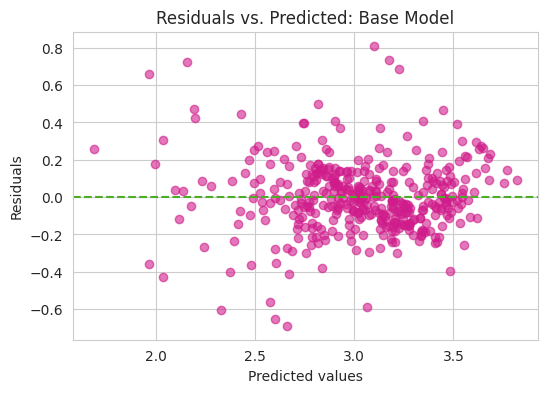

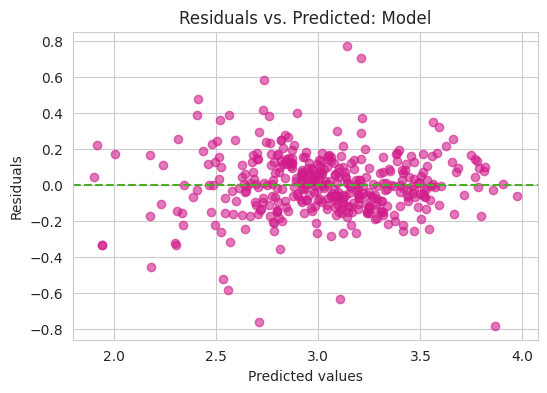

In [ ]:
plot_residuals_vs_predicted(ols_base, X_base_train, y_train, title='Base Model')
plot_residuals_vs_predicted(ols, X_train, y_train, title='Model')

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_base_train)

lzip(name, test)

[('F statistic', np.float64(0.8954678890465884)),
 ('p-value', np.float64(0.7786744934099201))]

In [ ]:
test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', np.float64(0.8393806905065848)),
 ('p-value', np.float64(0.88516219660738))]

# **Observations:**
1) Visual inspection: In both models we see no strong directional patterns. We do see however some greater spread to the left, but nothing to really worry about.

2) P value > 0.05. We fail to reject the null hypothesys. Residuals are homoscedastic. Not that there's anything wrong with that...


# **Linearity of variables**
Predictor variables should have a linear relation with the dependent variable (Linear regression, after all...)

I'll plot residuals and the fitted values on a plot and see if residuals make a pattern or anything else suspicious...

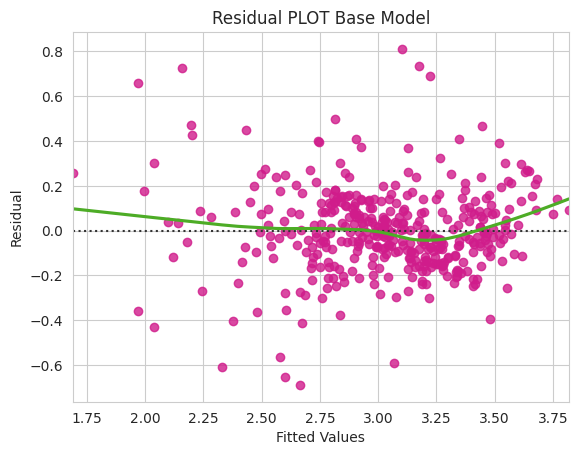

In [ ]:
# Predicted values
fitted = ols_base.fittedvalues

sns.residplot(x = fitted, y = ols_base.resid,  lowess = True, line_kws={'color': '#4dac26'})

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT Base Model")

plt.show()

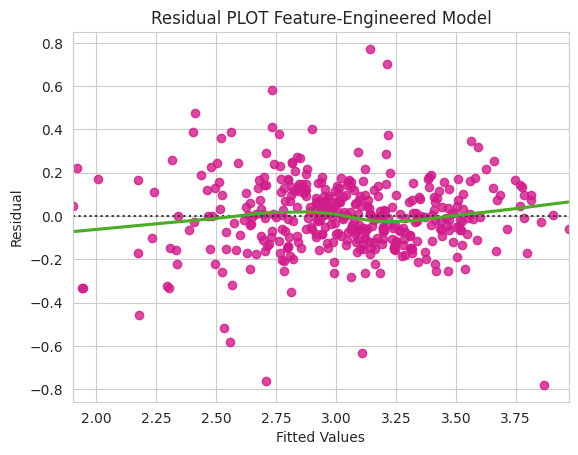

In [ ]:
# Predicted values
fitted = ols.fittedvalues

sns.residplot(x = fitted, y = ols.resid,  lowess = True, line_kws={'color': '#4dac26'})

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT Feature-Engineered Model")

plt.show()

# **Observations:**
The residual plot for the feature engineered model shows a flatter lowess line compared to the base model that is U shaped, suggesting our non-linear transformed features are doing their job

Fitted value range is lower (starts from 2), residuals are more centered.

# **Normality of error terms**

We need to check if residuals are normally distributed

Text(0.5, 1.0, 'Base model')

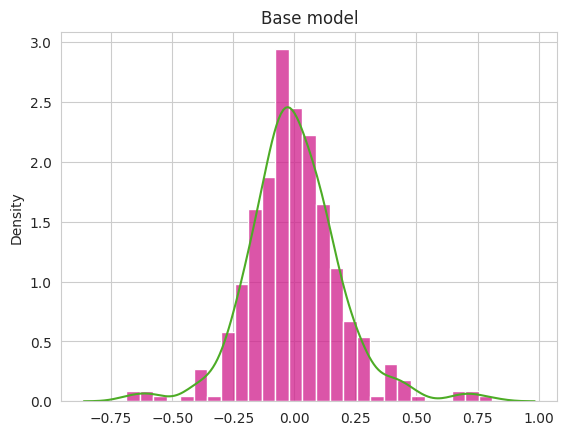

In [ ]:
# Plot histogram of base residuals
sns.histplot(ols_base.resid, color='#d01c8b', stat='density')  # Histogram
sns.kdeplot(ols_base.resid, color='#4dac26')  # KDE line
plt.title("Base model")


Text(0.5, 1.0, 'Model')

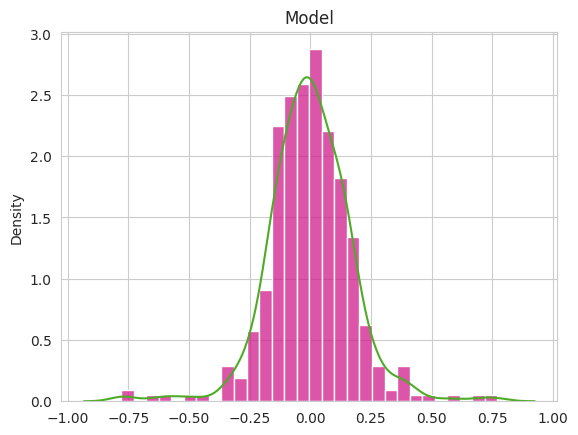

In [ ]:
# Plot histogram of log + bin residuals
sns.histplot(ols.resid, color='#d01c8b', stat='density')  # Histogram
sns.kdeplot(ols.resid, color='#4dac26')  # KDE line
plt.title("Model")


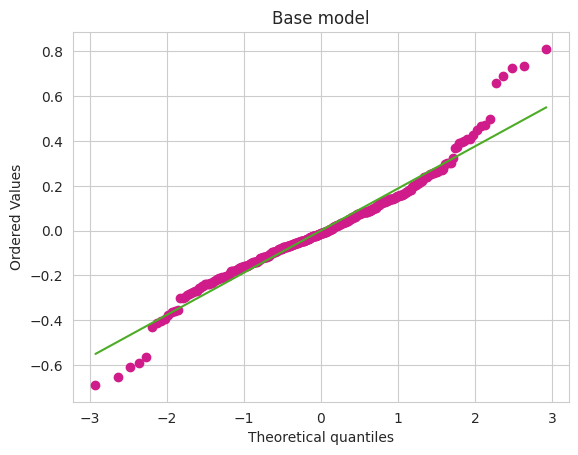

In [ ]:
# Q-Q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(ols_base.resid, dist = "norm", plot = pylab)
plt.gca().get_lines()[0].set_color('#d01c8b')  # dots
plt.gca().get_lines()[1].set_color('#4dac26')  # line
plt.title("Base model")
plt.show()

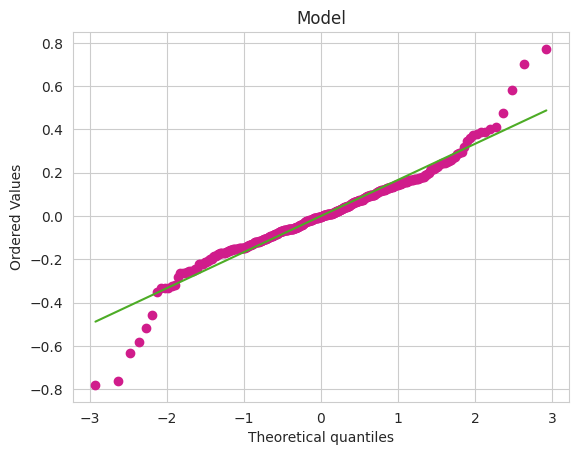

In [ ]:
# Q-Q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(ols.resid, dist = "norm", plot = pylab)
plt.gca().get_lines()[0].set_color('#d01c8b')  # dots
plt.gca().get_lines()[1].set_color('#4dac26')  # line
plt.title("Model")
plt.show()

# **Observation:**
Both models seem normal. The histograms seem almost symetrical and bell-shaped. Q-Q plot of residuals the dots follow the normal line most of the time (tails are acceptable). This supports the normality assumption, in both models. We don't see any difference visually.

# **Let's cross validate**

In [ ]:
 X_base_train.head()

,CRIM,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
42,0.14150,0,0.448,6.169,5.7209,3,17.9,5.81
58,0.15445,0,0.453,6.145,7.8148,8,19.7,6.86
385,16.81180,0,0.700,5.277,1.4261,24,20.2,30.81
78,0.05646,0,0.437,6.232,5.0141,5,18.7,12.34
424,8.79212,0,0.584,5.565,2.0635,24,20.2,17.16


In [ ]:
 X_train.head()

,CHAS,NOX,PTRATIO,RM_centered,RM_squared,LSTAT_centered,LSTAT_squared,DIS_centered,DIS_squared,RAD_centered,AGE_trans,CRIM_trans_centered,CRIM_trans_squared
42,0,0.448,17.9,-0.115634,0.013371,-6.843063,46.827515,1.925857,3.708926,-6.549407,6.6,-3.469465,0.020022
58,0,0.453,19.7,-0.139634,0.019498,-5.793063,33.559582,4.019757,16.158449,-1.549407,29.2,-3.456515,0.023855
385,0,0.700,20.2,-1.007634,1.015327,18.156937,329.674352,-2.368943,5.611889,14.450593,98.1,13.200835,282.636619
78,0,0.437,18.7,-0.052634,0.002770,-0.313063,0.098009,1.219057,1.486101,-4.549407,53.7,-3.554505,0.003188
424,0,0.584,20.2,-0.719634,0.517874,4.506937,20.312479,-1.731543,2.998240,14.450593,70.6,5.181155,77.301374


In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_base_train, y_train, cv = 10) # Splitting the data to 10 folds
cv_Score12 = cross_val_score(linearregression, X_base_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')
cv_Score13 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score14 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')

print('Base Model')
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

print('Feature Engineered Model')

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score13.mean(), cv_Score13.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score14.mean(), cv_Score14.std() * 2))


Base Model
RSquared: 0.733 (+/- 0.201)
Mean Squared Error: 0.040 (+/- 0.018)
Feature Engineered Model
RSquared: 0.761 (+/- 0.275)
Mean Squared Error: 0.033 (+/- 0.016)


Observation: oooh nice. our R2 is a bit jumpy but higher. Our MSE is lower in the FE Model. Looks promissing.

In [ ]:
X = X.drop(columns=['RM', 'RAD', 'LSTAT', 'TAX', 'AGE', 'DIS', 'CRIM', 'CRIM_trans', 'INDUS', 'ZN'])

In [ ]:
X.head()

,CHAS,NOX,PTRATIO,RM_centered,RM_squared,LSTAT_centered,LSTAT_squared,DIS_centered,DIS_squared,RAD_centered,AGE_trans,CRIM_trans_centered,CRIM_trans_squared
0,0,0.538,15.3,0.290366,0.084312,-7.673063,58.875900,0.294957,0.087000,-8.549407,32.60,-3.604645,0.000040
1,0,0.469,17.8,0.136366,0.018596,-3.513063,12.341613,1.172057,1.373718,-7.549407,39.45,-3.583655,0.000746
2,0,0.469,17.8,0.900366,0.810658,-8.623063,74.357220,1.172057,1.373718,-7.549407,30.55,-3.583675,0.000745
3,0,0.458,18.7,0.713366,0.508890,-9.713063,94.343598,2.267157,5.140002,-6.549407,45.80,-3.578595,0.001048
4,0,0.458,18.7,0.862366,0.743674,-7.323063,53.627255,2.267157,5.140002,-6.549407,54.20,-3.541915,0.004768


In [ ]:
X_base.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [ ]:
X_base_train.head()

,CRIM,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
42,0.14150,0,0.448,6.169,5.7209,3,17.9,5.81
58,0.15445,0,0.453,6.145,7.8148,8,19.7,6.86
385,16.81180,0,0.700,5.277,1.4261,24,20.2,30.81
78,0.05646,0,0.437,6.232,5.0141,5,18.7,12.34
424,8.79212,0,0.584,5.565,2.0635,24,20.2,17.16


In [ ]:
def model_pref_sklearn(model, x_train, x_test, y_train, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_train, y_pred_train)),
                    np.sqrt(mean_squared_error(y_test, y_pred_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_train, y_pred_train),
                    mean_absolute_error(y_test, y_pred_test),
                ],
                "R²": [
                    r2_score(y_train, y_pred_train),
                    r2_score(y_test, y_pred_test),
                ],
            }
        )
    )

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit both models
sklinearregression = LinearRegression()
skl_base_model = LinearRegression().fit(X_base_train, y_train)
sk_model = sklinearregression.fit(X_train, y_train)

print("Base Model")
model_pref_sklearn(skl_base_model, X_base_train, X_base_test, y_train, y_test)

print("Model")
model_pref_sklearn(sk_model, X_train, X_test, y_train, y_test)

Base Model
    Data      RMSE       MAE        R²
0  Train  0.188143  0.135757  0.783387
1   Test  0.201199  0.151518  0.774987
Model
    Data      RMSE       MAE        R²
0  Train  0.170374  0.123245  0.822371
1   Test  0.184531  0.133291  0.810723


# **Observation:**

Model Comparison Summary (10-fold Cross-Validation):

The feature-engineered model outperforms the base model on both key metrics:

R² improves from 0.745 to 0.77, indicating better explanatory power.

Mean Squared Error drops from 0.042 to 0.038, showing lower average prediction error.

In the FE model we see a little bit more overfitting, but not at alarming level. We will take care of that soon.

Additionally, the variance of error (± std X 2) is slightly reduced in the engineered model (±0.016 vs. ±0.018), suggesting more stable performance across folds.


 Hurrah!

# **Let's SHAP**

In [ ]:
print(X_base_train_const.shape)
print(X_base_test_const.shape)
print(type(X_base_train_const))
print(type(X_base_test_const))

(404, 9)
(102, 9)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


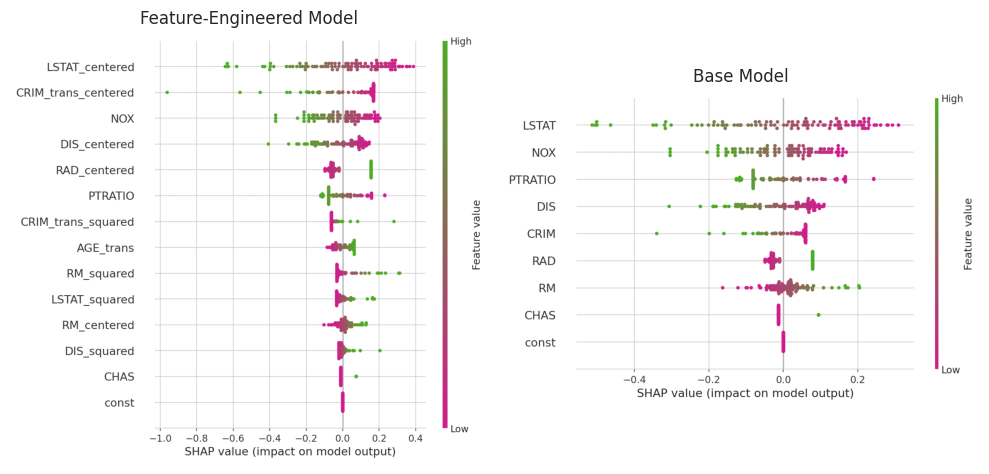

In [ ]:
import shap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from io import BytesIO
from PIL import Image

# Fit models
sk_base_model = LinearRegression().fit(X_base_train_const, y_train)
sk_model = LinearRegression().fit(X_train_const, y_train)

# Custom color map
bubblegum_pistachio_cmap = LinearSegmentedColormap.from_list(
    name='bubblegum_pistachio',
    colors=['#d01c8b', '#4dac26']
)

# SHAP explainers
explainer_base = shap.Explainer(sk_base_model, X_base_train_const)
shap_values_base = explainer_base(X_base_test_const)

explainer = shap.Explainer(sk_model, X_train_const)
shap_values = explainer(X_test_const)

# Function to capture SHAP summary_plot as image
def capture_shap_plot(shap_values, data, cmap):
    buf = BytesIO()
    plt.figure()
    shap.summary_plot(shap_values.values, data, cmap=cmap, show=False)
    plt.tight_layout()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=150)
    plt.close()
    buf.seek(0)
    return Image.open(buf)

# Capture both plots
img1 = capture_shap_plot(shap_values, X_test_const, bubblegum_pistachio_cmap)
img2 = capture_shap_plot(shap_values_base, X_base_test_const, bubblegum_pistachio_cmap)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0].imshow(img1)
axes[0].axis('off')
axes[0].set_title("Feature-Engineered Model")

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title("Base Model")

plt.tight_layout()
plt.show()

# **Conclusions:**
Our strongest predictor is LSTAT. The transformation improved its interpretability and range.

TM models distance-based patterns abit better.

Transformation surfaced the hidden predictive power AGE, that is absent from the base model due to insignificance.

CRIM_trans_centered has a larger and more symmetric spread (from -1 to nearly +2), meaning it's highly influential, both positively and negatively.

CRIM_trans_squared adds distinct nonlinear contributions, especially when CRIM is very high or very low these effects wouldn't be captured by a linear term alone.These features together supplant the raw CRIM variable in both importance and nuance.

Crime is a strong negative predictor except in young, semi-zoned areas — there it's not as damaging



# **Let's Regularize**

But first, I'll bring back many dropped features, Because a regularized model is like a house party - everyone's invited, but only the chill ones get to stay

In [ ]:
X_L = df.drop(columns=[col for col in df.columns if any(x in col for x in ['bin', 'MEDV_log','OLD_AREA', 'RISK'])])

X_L.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RM_squared,LSTAT_centered,LSTAT_squared,DIS_centered,DIS_squared,RAD_centered,AGE_trans,CRIM_trans,CRIM_trans_centered,CRIM_trans_squared
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,...,0.084312,-7.673063,58.875900,0.294957,0.087000,-8.549407,32.60,0.00632,-3.604645,0.000040
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,...,0.018596,-3.513063,12.341613,1.172057,1.373718,-7.549407,39.45,0.02731,-3.583655,0.000746
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,...,0.810658,-8.623063,74.357220,1.172057,1.373718,-7.549407,30.55,0.02729,-3.583675,0.000745
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,...,0.508890,-9.713063,94.343598,2.267157,5.140002,-6.549407,45.80,0.03237,-3.578595,0.001048
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,...,0.743674,-7.323063,53.627255,2.267157,5.140002,-6.549407,54.20,0.06905,-3.541915,0.004768


In [ ]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Parameter grids
alphas = np.logspace(-3, 2, 50)
l1_ratios = np.linspace(0.1, 0.9, 9)

# Models
ridge_model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, cv=10))
elastic_model = make_pipeline(StandardScaler(), ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10))

# Split data
X_L_train, X_L_test, y_train, y_test = train_test_split(X_L, y, test_size=0.2, random_state=1)

# Fit models
ridge_model.fit(X_L_train, y_train)
elastic_model.fit(X_L_train, y_train)

# Predict
y_train_ridge = ridge_model.predict(X_L_train)
y_test_ridge = ridge_model.predict(X_L_test)

y_train_elastic = elastic_model.predict(X_L_train)
y_test_elastic = elastic_model.predict(X_L_test)

# Ridge Metrics
ridge_r2_train = r2_score(y_train, y_train_ridge)
ridge_r2_test = r2_score(y_test, y_test_ridge)
ridge_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_ridge))
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_ridge))

# ElasticNet Metrics
elastic_r2_train = r2_score(y_train, y_train_elastic)
elastic_r2_test = r2_score(y_test, y_test_elastic)
elastic_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_elastic))
elastic_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_elastic))

# Output
print("=== Ridge ===")
print(f"Train R²: {ridge_r2_train:.3f}, RMSE: {ridge_rmse_train:.3f}")
print(f"Test  R²: {ridge_r2_test:.3f}, RMSE: {ridge_rmse_test:.3f}")

print("\n=== ElasticNet ===")
print(f"Train R²: {elastic_r2_train:.3f}, RMSE: {elastic_rmse_train:.3f}")
print(f"Test  R²: {elastic_r2_test:.3f}, RMSE: {elastic_rmse_test:.3f}")

=== Ridge ===
Train R²: 0.829, RMSE: 0.167
Test  R²: 0.830, RMSE: 0.175

=== ElasticNet ===
Train R²: 0.830, RMSE: 0.167
Test  R²: 0.830, RMSE: 0.175


In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Fit ElasticNetCV with many l1_ratios
alphas = np.logspace(-3, 2, 50)
l1_ratios = np.linspace(0.1, 0.9, 9)

elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, fit_intercept=True)
elastic_cv.fit(X_L, y)  # or X_L_train if already split

# Get selected l1_ratio
print(f"Best l1_ratio: {elastic_cv.l1_ratio_}")
print(f"Best alpha: {elastic_cv.alpha_}")

Best l1_ratio: 0.1
Best alpha: 0.001


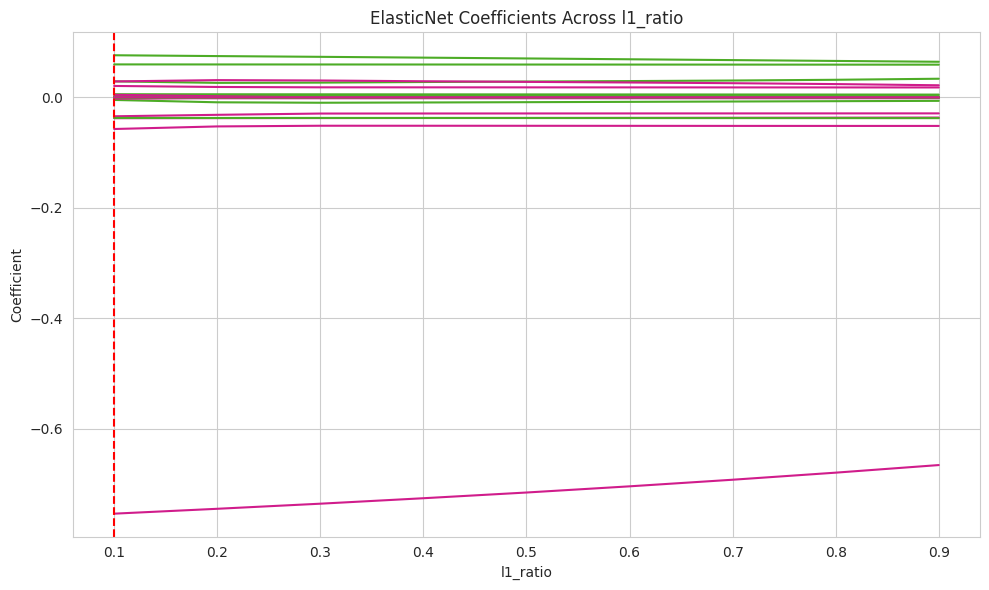

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

l1s = np.linspace(0.1, 0.9, 9)
coefs = []

for l1 in l1s:
    model = ElasticNet(alpha=0.001, l1_ratio=l1)
    model.fit(X_L, y)
    coefs.append(model.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))
for i in range(coefs.shape[1]):
    plt.plot(l1s, coefs[:, i], label=f"Feature {i}" if len(X_L.columns) <= 10 else None)

plt.axvline(0.1, color='red', linestyle='--', label='Best l1_ratio')
plt.title("ElasticNet Coefficients Across l1_ratio")
plt.xlabel("l1_ratio")
plt.ylabel("Coefficient")
if len(X_L.columns) <= 10:
    plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

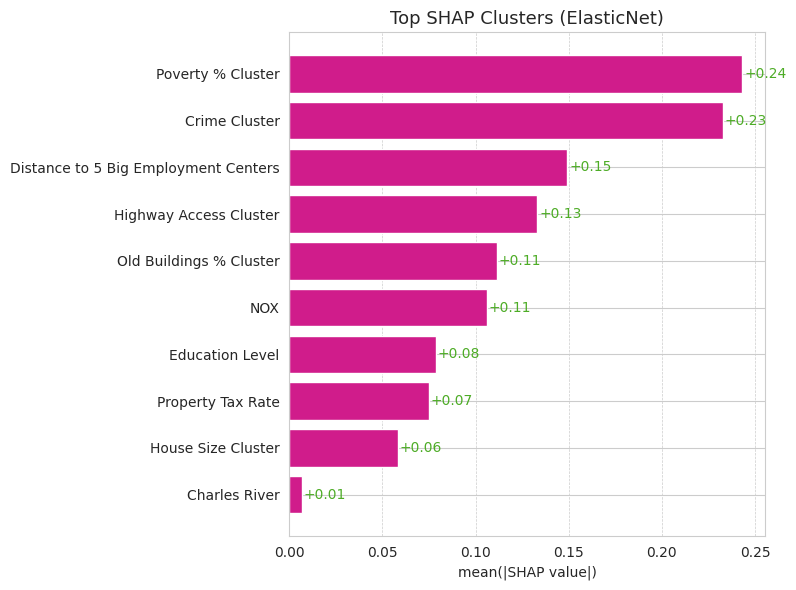

In [ ]:
#  scale  X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_L_test)
feature_names = X_L_test.columns
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# SHAP Linear Explainer
explainer = shap.Explainer(elastic_model.named_steps['elasticnetcv'], X_scaled_df)
shap_values = explainer(X_scaled_df)

# Summarize SHAP by feature
shap_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
})

# Group into clusters
def assign_cluster(f):
    if 'CRIM' in f: return 'Crime Cluster'
    if 'LSTAT' in f: return 'Poverty % Cluster'
    if 'RM' in f: return 'House Size Cluster'
    if 'AGE' in f: return 'Old Buildings % Cluster'
    if 'NOX' in f: return 'NOX'
    if 'RAD' in f: return 'Highway Access Cluster'
    if 'DIS' in f: return 'Distance to 5 Big Employment Centers'
    if 'ZN' in f: return  'Residential Land % in Large Lots'
    if 'INDUS' in f: return 'Industrail Zones %'
    if 'CHAS' in f: return 'Charles River'
    if 'RAD' in f: return 'Highway Access Cluster'
    if 'TAX' in f: return 'Property Tax Rate'
    if 'PTRATIO' in f: return 'Education Level'
    return None

shap_df['cluster'] = shap_df['feature'].apply(assign_cluster)
shap_clustered = shap_df.dropna().groupby('cluster').sum().reset_index()
shap_clustered = shap_clustered.sort_values(by='mean_abs_shap', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(shap_clustered['cluster'], shap_clustered['mean_abs_shap'], color='#d01c8b')
plt.xlabel("mean(|SHAP value|)")
plt.gca().invert_yaxis()
for bar, val in zip(bars, shap_clustered['mean_abs_shap']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f"+{val:.2f}", va='center', color='#4dac26')
plt.title("Top SHAP Clusters (ElasticNet)", fontsize=13)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 90 candidates, totalling 270 fits
 Hard-Tuned XGBoost
Train R²: 0.949, RMSE: 0.091
Test  R²: 0.875, RMSE: 0.150

Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


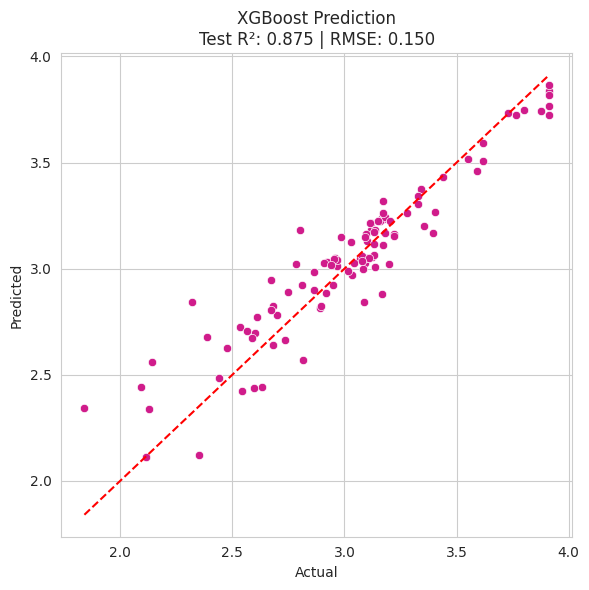

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_L, y, test_size=0.2, random_state=1)

# Enhanced param grid
param_dist = {
    'max_depth': [2, 3, 4, 5, 6],
     'learning_rate': [0.01, 0.025, 0.05, 0.075],
    'n_estimators': [100, 200, 300, 500],          # # of trees
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'reg_lambda': [1, 2, 3, 4, 5],                   #  L2
    'reg_alpha': [0.1, 0.3, 0.6, 1.5, 2]             #  L1
}

# Base model
base_model = XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=10,
    eval_metric='rmse',
    random_state=1,
    verbosity=0
)

# Search
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=90,                    # work harder! we want to beat AutoML
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=1
)

# Fit with early stopping on held-out set
random_search.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Best model
best_model = random_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output
print(" Hard-Tuned XGBoost")
print(f"Train R²: {train_r2:.3f}, RMSE: {train_rmse:.3f}")
print(f"Test  R²: {test_r2:.3f}, RMSE: {test_rmse:.3f}")
print("\nBest Hyperparameters:", random_search.best_params_)

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"XGBoost Prediction\nTest R²: {test_r2:.3f} | RMSE: {test_rmse:.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)
xgb_pred = best_model.predict(X_test)

# Blend
final_pred = 0.7 * xgb_pred + 0.3 * ridge_pred
final_r2 = r2_score(y_test, final_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"Blended R²: {final_r2:.3f}, RMSE: {final_rmse:.3f}")

Blended R²: 0.879, RMSE: 0.148


In [ ]:
# Search best weight
best_score = 0
best_w = 0

for w in np.linspace(0, 1, 101):
    blend_pred = w * xgb_pred + (1 - w) * ridge_pred
    score = r2_score(y_test, blend_pred)
    if score > best_score:
        best_score = score
        best_w = w

print(f"Best blend: {best_w:.2f} XGBoost, {1-best_w:.2f} Ridge → R² = {best_score:.4f}")

Best blend: 0.78 XGBoost, 0.22 Ridge → R² = 0.8795


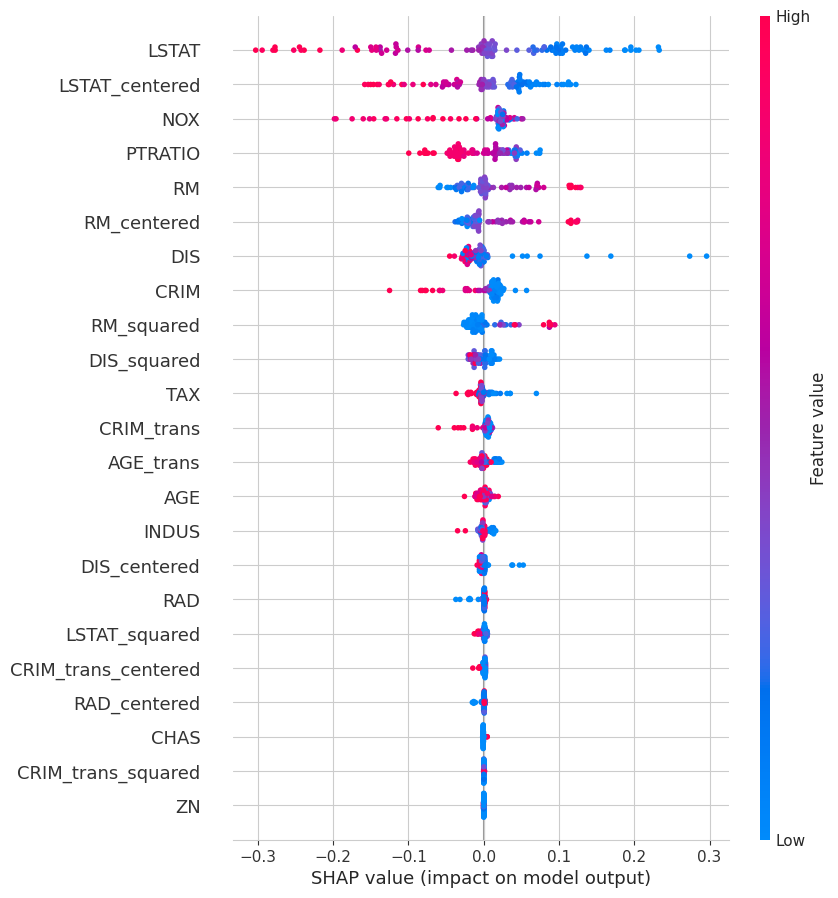

In [ ]:
import shap
import matplotlib.pyplot as plt


# Recreate SHAP explainer for best_model (XGBoost)
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=25)

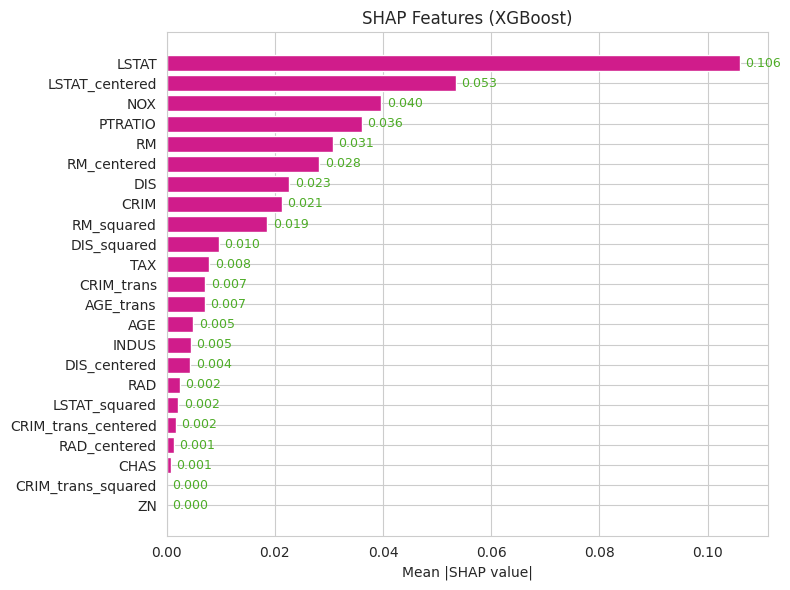

In [ ]:
import shap


# Create SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Compute mean absolute SHAP values per feature
shap_vals_abs_mean = np.abs(shap_values.values).mean(axis=0)
feature_names = X_test.columns

# Build sorted DataFrame
shap_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP|': shap_vals_abs_mean
}).sort_values('Mean |SHAP|', ascending=False).head(25)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.barh(
    shap_df['Feature'][::-1],                     # reversed for top-down ordering
    shap_df['Mean |SHAP|'][::-1],                 # same
    color='#d01c8b'
)
plt.xlabel('Mean |SHAP value|')
plt.title('SHAP Features (XGBoost)')


# Labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center', color='#4dac26', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
X_base_train, X_base_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit both models
sklinearregression = LinearRegression()
skl_base_model = LinearRegression().fit(X_base_train, y_train)
sk_model = sklinearregression.fit(X_train, y_train)

print("===Linear Base Model===")
model_pref_sklearn(skl_base_model, X_base_train, X_base_test, y_train, y_test)

print("")

print("===Linear Feature-Engineered Model===")
model_pref_sklearn(sk_model, X_train, X_test, y_train, y_test)

print("")

print("=== Ridge ===")
print(f"Train R²: {ridge_r2_train:.3f}, RMSE: {ridge_rmse_train:.3f}")
print(f"Test  R²: {ridge_r2_test:.3f}, RMSE: {ridge_rmse_test:.3f}")

print("\n=== ElasticNet ===")
print(f"Train R²: {elastic_r2_train:.3f}, RMSE: {elastic_rmse_train:.3f}")
print(f"Test  R²: {elastic_r2_test:.3f}, RMSE: {elastic_rmse_test:.3f}")

print("\n=== Hard-Tuned XGBoost ===")
print(f"Train R²: {train_r2:.3f}, RMSE: {train_rmse:.3f}")
print(f"Test  R²: {test_r2:.3f}, RMSE: {test_rmse:.3f}")
print("\nBest Hyperparameters:", random_search.best_params_)

print("")

print("\n=== Ensemble ===")
print(f"Best blend: {best_w:.2f} XGBoost, {1-best_w:.2f} Ridge → R² = {best_score:.4f}")

===Linear Base Model===
    Data      RMSE       MAE        R²
0  Train  0.188143  0.135757  0.783387
1   Test  0.201199  0.151518  0.774987

===Linear Feature-Engineered Model===
    Data      RMSE       MAE        R²
0  Train  0.170374  0.123245  0.822371
1   Test  0.184531  0.133291  0.810723

=== Ridge ===
Train R²: 0.829, RMSE: 0.167
Test  R²: 0.830, RMSE: 0.175

=== ElasticNet ===
Train R²: 0.830, RMSE: 0.167
Test  R²: 0.830, RMSE: 0.175

=== Hard-Tuned XGBoost ===
Train R²: 0.949, RMSE: 0.091
Test  R²: 0.875, RMSE: 0.150

Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


=== Ensemble ===
Best blend: 0.78 XGBoost, 0.22 Ridge → R² = 0.8795
